# Procesamiento Digital de Señales <img src="./logo_UTN.svg" align="right" width="150"/>
## Alumno: Emanuel Olay
### Tarea Semanal: 8
### Consigna:
En esta tarea continuaremos con el capítulo 14 de Holton. DSP Principles and App. y el 8 de Hayes.

Para ello, realizaremos el punto 4 del TP3.

4) Evalue el siguiente estimador de frecuencia de una senoidal contaminada por ruido incorrelado.

Para una señal x(k)=a1⋅sen(Ω1⋅k)+n(k)

siendo 

Ω1=Ω0+fr⋅2πN


Ω0=π2


y las variables aleatorias definidas por

fr∼U(−12,12)


n∼N(0,σ2)


Evalúe el siguiente estimador de Ω1

Ω^W1=arg maxf{PW^}


basado en el periodograma de Welch evaluado en el TP3. Del mismo modo, evalúe otro estimador de la PSD para crear otro estimador de Ω1

Ω^X1=arg maxf{PX^}


Considere 200 realizaciones de 1000 muestras para cada experimento. Cada realización debe tener un SNR tal que el pico de la senoidal esté 3 y 10 db por encima del piso de ruido impuesto por n(k).

Ayuda: Puede utilizar el módulo de análisis espectral Spectrum donde encontrará la mayoría de los métodos descriptos en el Capítulo 8 del libro de Hayes.

Bonus
Implementar el periodograma de Welch


In [51]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.fft import fft, fftshift
import matplotlib.patches as mpatches
from pandas import DataFrame
from IPython.display import HTML

#######################################################################################################################
#%% Trato de definir para calculo de periodograma de blackman y tuckey
#######################################################################################################################
import spectrum
from spectrum.datasets import marple_data
from pylab import legend, ylim
norm = True
sides = 'centerdc'

width=15
height=5
plt.rcParams['figure.figsize'] = [width, height]

In [52]:
#######################################################################################################################
#%% Inicio de la simulación
#######################################################################################################################
plt.close('all')

# Datos generales de la simulación
fs = 1000 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras

Iter=200

figura=0
 
ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral

t=np.arange(0,1,ts)
f=np.arange(0,fs,df)
####################
###Armo la se;al
###Pruebo con un noise ratio bajo a ver si los resultados salen bonitos
####################
a1=1
#calculo el ratio con SNR=10*log(a1/noise_power)
SNR=np.array([3,10])
noise_power=np.zeros_like(SNR)
noise=np.zeros_like(SNR)
noise_power=a1/(10**(SNR/10))

omega_0=np.pi/2
fr=np.random.uniform(low=-1/2, high=1/2, size=Iter)

omega_1=omega_0+fr*2*np.pi/N
## como uno es de (200,1) y el otro es de (1000,1) no puedo hacer el producto
##cambio los ejes para que sea (200,1)*(1,1000)
####################
###Primer experimento con 3dB
###Ya que hacer una matriz 3D me la complica al pedo
####################
noise_0=np.random.normal(loc=0,scale=np.sqrt(noise_power[0]),size=(1000,Iter))
##Verificacion de las caracteristicas de mi ruido
# var=np.var(noise_0)
# mean=np.mean(noise_0)
senal=np.sqrt(2*a1)*np.sin(2*np.pi*omega_1.reshape(1,Iter)*(fs/(2*np.pi))*t.reshape(1000,1))
x_0=senal + noise_0
#plt.plot(t,x[:,1])
####################
###Segundo experimento con 10dB
###Ya que hacer una matriz 3D me la complica al pedo
####################
noise_1=np.random.normal(loc=0,scale=np.sqrt(noise_power[1]),size=(1000,Iter))
##Verificacion de la potencia de mi señal
# var=np.var(noise)
# mean=np.mean(noise)
x_1=senal + noise_1

lag0=int (len(x_0)/10)
lag1=int (len(x_1)/10)

x0_picos_BT = np.zeros(Iter)

x1_picos_BT = np.zeros(Iter)


(-20.0, 1.0)

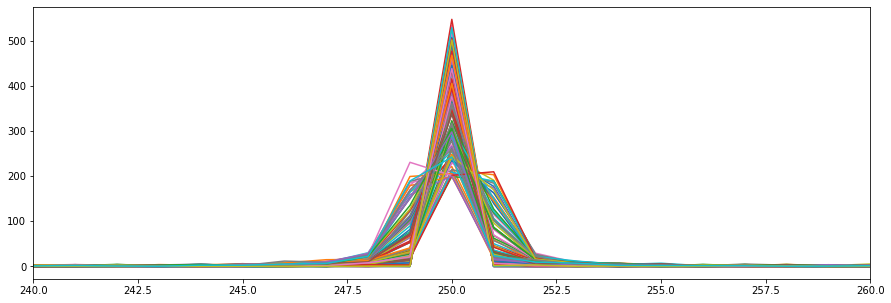

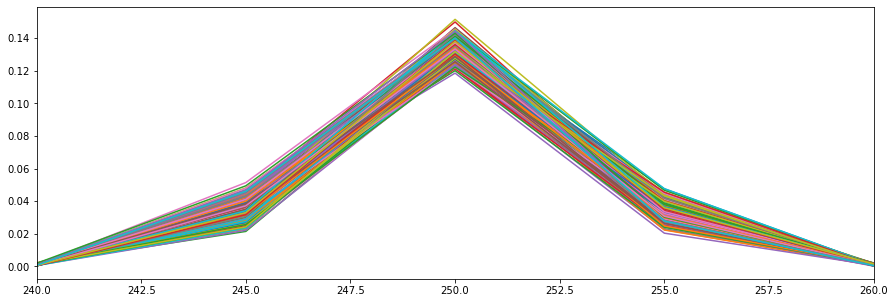

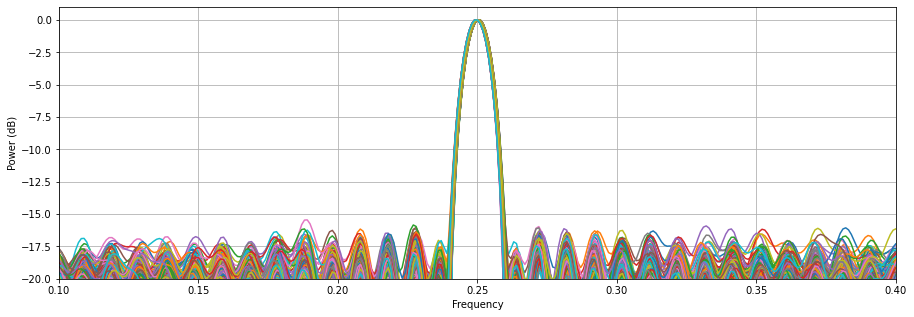

In [53]:
################################
#%%Calculo del periodograma con 3 dB
################################

#calculo el periodograma normal
Pp=(1/N)*np.abs((fft(x_0,axis=0)))**2

#Metodo de Welch
f_welch,Pxx_den = sig.welch(x_0,fs=fs,nperseg=N/5,axis=0)

#%%Grafico las salidas
plt.figure(figura)
figura+=1
##Restrinjo las salidas para ver mas claramente los efectos del calculo
#plt.semilogy(f,Pp)
plt.plot(f,Pp)
plt.xlim(240,260)

plt.figure(figura)
figura+=1
#plt.semilogy(f_welch,Pxx_den)
plt.plot(f_welch,Pxx_den)
plt.xlim(240,260)
############
#Ya que spectrum no tiene ninguna implementacion para axis armo las comparaciones con 1 muestra a la vez
############
plt.figure(figura)
figura+=1
for i in range(len(fr)):
    p_BT = spectrum.pcorrelogram(x_0[:,i], lag=lag0)
    p_BT(); 
    p_BT.plot(label='Correlogram(15)', norm=norm, sides=sides)
plt.xlim(0.1,0.4)
plt.ylim(-20,1)


(-20.0, 1.0)

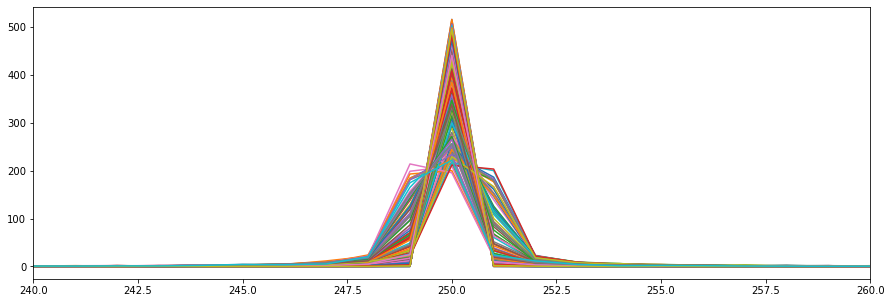

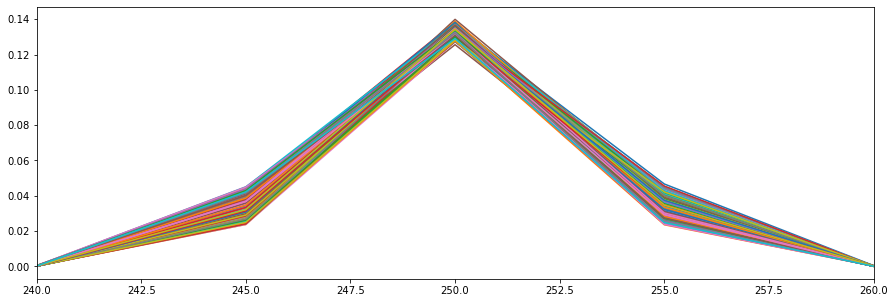

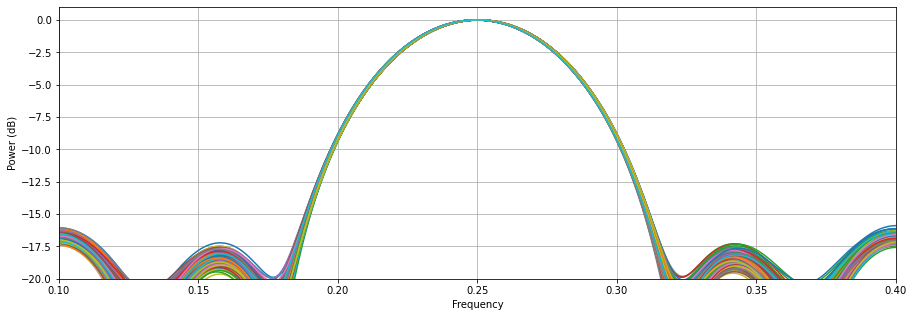

In [54]:
################################
###Calculo del periodograma con 10 dB
################################

#calculo el periodograma normal
Pp=(1/N)*np.abs((fft(x_1,axis=0)))**2

#Metodo de Welch
f_welch,Pxx_den = sig.welch(x_1,fs=fs,nperseg=N/5,axis=0)

##Grafico las salidas
plt.figure(figura)
figura+=1
##En este grafico restrinjo el eje x ya que no queremos la otra mitad
#plt.semilogy(f,Pp)
plt.plot(f,Pp)
plt.xlim(240,260)


plt.figure(figura)
figura+=1
#plt.semilogy(f_welch,Pxx_den)
plt.plot(f_welch,Pxx_den)
plt.xlim(240,260)

############
#Ya que spectrum no tiene ninguna implementacion para axis armo las comparaciones con 1 muestra a la vez
############
plt.figure(figura)
figura+=1
for i in range(len(fr)):
    p_BT = spectrum.pcorrelogram(x_1[:,i], lag=15)
    p_BT(); 
    p_BT.plot(label='Correlogram(15)', norm=norm, sides=sides)
plt.xlim(0.1,0.4)
plt.ylim(-20,1)

(-20.0, 1.0)

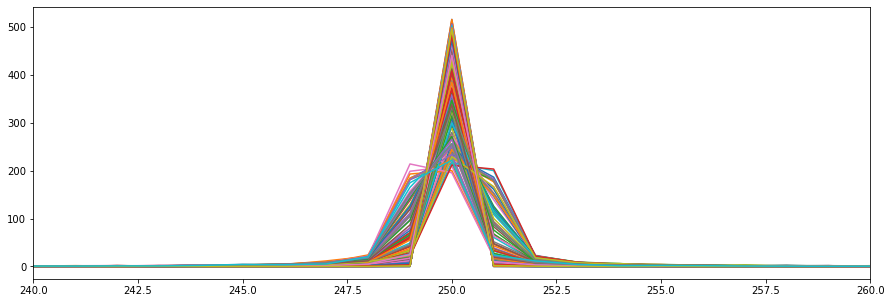

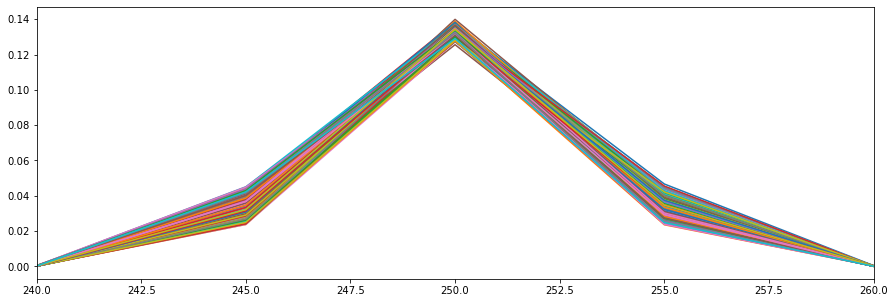

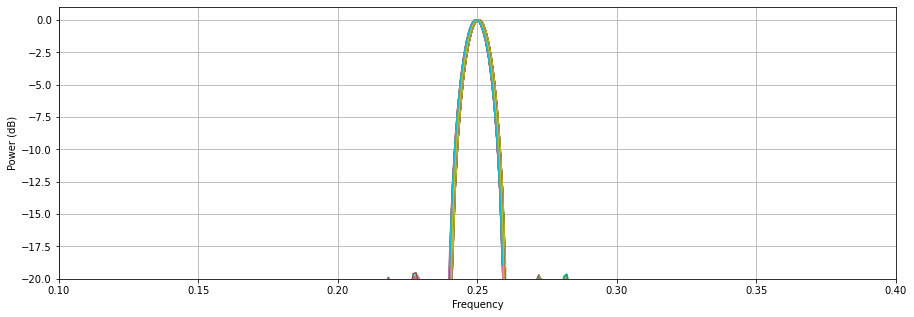

In [55]:
################################
#%%Calculo del periodograma con 10 dB
################################

#calculo el periodograma normal
Pp=(1/N)*np.abs((fft(x_1,axis=0)))**2

#Metodo de Welch
f_welch,Pxx_den = sig.welch(x_1,fs=fs,nperseg=N/5,axis=0)

##Grafico las salidas
plt.figure(figura)
figura+=1
##En este grafico restrinjo el eje x ya que no queremos la otra mitad
#plt.semilogy(f,Pp)
plt.plot(f,Pp)
plt.xlim(240,260)


plt.figure(figura)
figura+=1
#plt.semilogy(f_welch,Pxx_den)
plt.plot(f_welch,Pxx_den)
plt.xlim(240,260)

############
#Ya que spectrum no tiene ninguna implementacion para axis armo las comparaciones con 1 muestra a la vez
############
plt.figure(figura)
figura+=1
for i in range(len(fr)):
    p_BT = spectrum.pcorrelogram(x_1[:,i], lag=lag1)
    p_BT(); 
    p_BT.plot(label='Correlogram(15)', norm=norm, sides=sides)
plt.xlim(0.1,0.4)
plt.ylim(-20,1)


Text(0, 0.5, 'Densisdad espectral de potencia [V**2/Hz]')

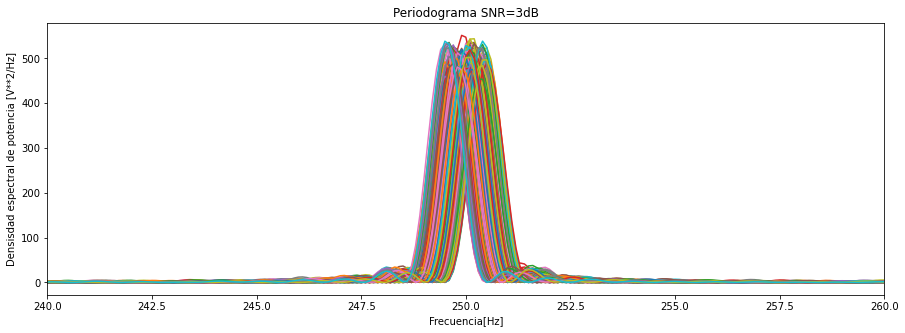

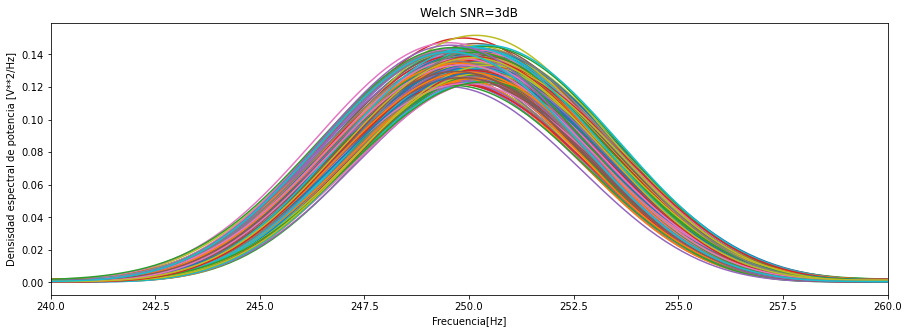

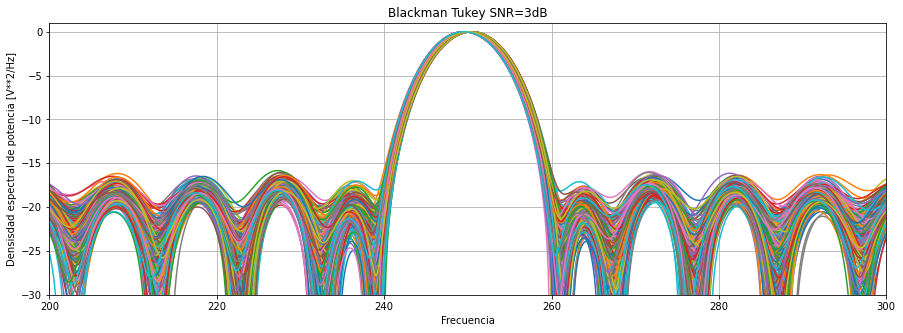

In [56]:
################################
#%%Calculo del periodograma con 3 dB y zero padding
################################
#Creo un nuevo vector f para los calculos
f_padded=np.arange(0,fs,fs/(10*N))

#calculo el periodograma normal
Pp=(1/N)*np.abs((fft(x_0,n=10*N,axis=0)))**2


#Metodo de Welch
f_welch_3db,Pxx_den_3db = sig.welch(x_0,fs=fs,nperseg=N/5,nfft=10*N,axis=0)

x0_picos_w = np.argmax(Pxx_den_3db, axis=0)/(10*N/N)
###Grafico las salidas
plt.figure(figura)
figura+=1
##Restrinjo las salidas para ver mas claramente los efectos del calculo


plt.plot(f_padded,Pp)
plt.title('Periodograma SNR={:1.0f}dB'.format(SNR[0]))
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Densisdad espectral de potencia [V**2/Hz]')
plt.xlim(240,260)


plt.figure(figura)
figura+=1

plt.plot(f_welch_3db,Pxx_den_3db)
plt.title('Welch SNR={:1.0f}dB'.format(SNR[0]))
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Densisdad espectral de potencia [V**2/Hz]')
plt.xlim(240,260)


############
#Ya que spectrum no tiene ninguna implementacion para axis armo las comparaciones con 1 muestra a la vez
############
plt.figure(figura)
figura+=1
for i in range(len(fr)):
    p_BT = spectrum.pcorrelogram(x_0[:,i], lag=lag0,NFFT=10*N,sampling=fs)
    x_0_BT=p_BT.psd
    x0_picos_BT[i] = np.argmax(x_0_BT, axis=0)/(10*N/N)
    p_BT(); 
    p_BT.plot(label='Correlogram(15)', norm=norm, sides=sides)
plt.xlim(200,300)
plt.ylim(-30,1)

plt.title('Blackman Tukey SNR={:1.0f}dB'.format(SNR[0]))
plt.xlabel('Frecuencia')
plt.ylabel('Densisdad espectral de potencia [V**2/Hz]')


(-30.0, 1.0)

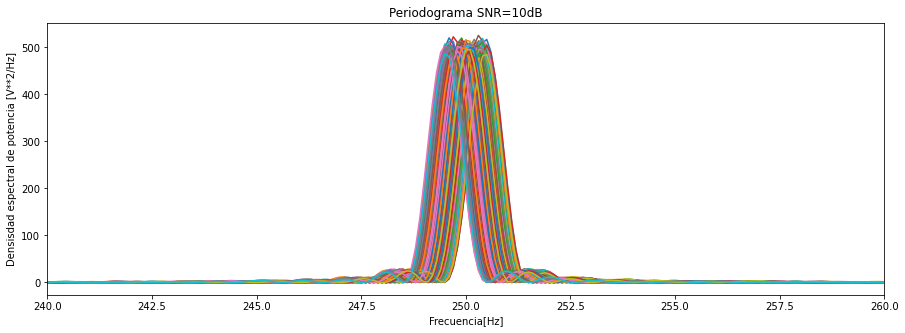

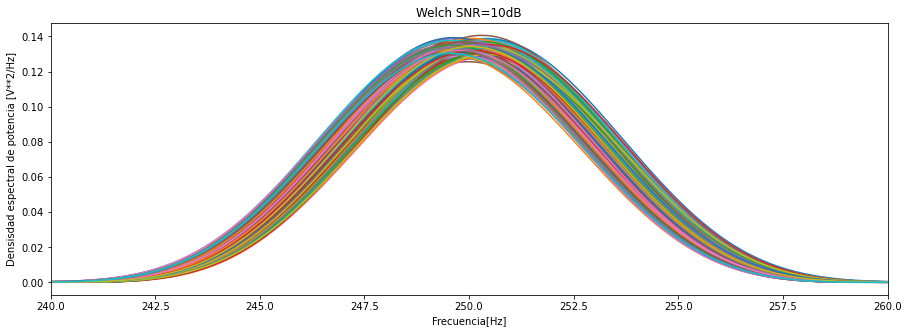

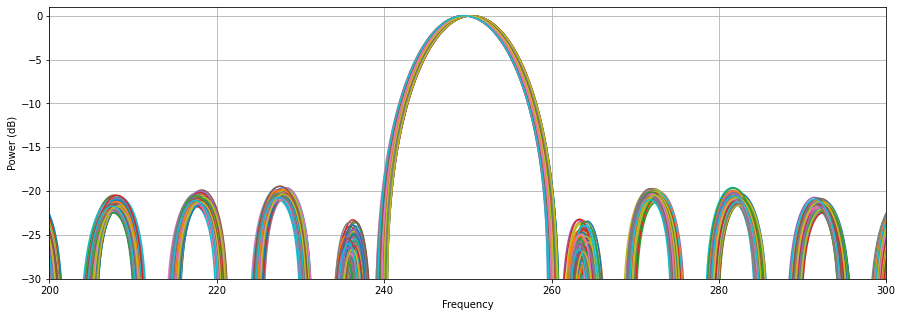

In [57]:
################################
#%%Calculo del periodograma con 10 dB y zero padding
################################

#calculo el periodograma normal
Pp=(1/N)*np.abs((fft(x_1,n=10*N,axis=0)))**2

#Metodo de Welch
f_welch_10db,Pxx_den_10db = sig.welch(x_1,fs=fs,nperseg=N/5,nfft=10*N,axis=0)
x1_picos_w = np.argmax(Pxx_den_10db, axis=0)/(10*N/N)

##Grafico las salidas
plt.figure(figura)
figura+=1
##En este grafico restrinjo el eje x ya que no queremos la otra mitad

plt.plot(f_padded,Pp)
plt.title('Periodograma SNR={:1.0f}dB'.format(SNR[1]))
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Densisdad espectral de potencia [V**2/Hz]')
plt.xlim(240,260)


plt.figure(figura)
figura+=1

plt.plot(f_welch_10db,Pxx_den_10db)
plt.title('Welch SNR={:1.0f}dB'.format(SNR[1]))
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Densisdad espectral de potencia [V**2/Hz]')
plt.xlim(240,260)

############
#Ya que spectrum no tiene ninguna implementacion para axis armo las comparaciones con 1 muestra a la vez
############
plt.figure(figura)
figura+=1
for i in range(len(fr)):
    p_BT = spectrum.pcorrelogram(x_1[:,i], lag=lag1,NFFT=10*N,sampling=fs)
    x_1_BT=p_BT.psd
    x1_picos_BT[i] = np.argmax(x_1_BT, axis=0)/(10*N/N)
    p_BT(); 
    p_BT.plot(label='Correlogram(15)', norm=norm, sides=sides)
plt.xlim(200,300)
plt.ylim(-30,1)



In [58]:
#######################
#%%Calculo de sesgo y varianza
#######################

#Sesgo: s = mu - a0

frecuencia_no = omega_1.reshape(1,Iter)*(fs/(2*np.pi))

Error_Welch_3dB = x0_picos_w - frecuencia_no
Error_Welch_10dB = x1_picos_w - frecuencia_no
Eror_BT_3dB = x0_picos_BT - frecuencia_no
Eror_BT_10dB = x1_picos_BT - frecuencia_no

#Varianza: Var(x)=E[(X-mu)**2]

# Muestro los datos

data = [[np.mean(Error_Welch_3dB), np.var(Error_Welch_3dB)],
        [np.mean(Error_Welch_10dB), np.var(Error_Welch_10dB)],
        [np.mean(Eror_BT_3dB), np.var(Eror_BT_3dB)],
        [np.mean(Eror_BT_10dB), np.var(Eror_BT_10dB)]]

df = DataFrame(data,columns=['$s_a$', '$v_a$'],
                index=[  
                        'Welch 3dB',
                        'Welch 10dB',
                        'Blackman Tuckey 3dB',
                        'Blackman Tuckey 10dB'
                      ])
HTML(df.to_html())



,$s_a$,$v_a$
Welch 3dB,0.003672,0.001994
Welch 10dB,0.002672,0.001058
Blackman Tuckey 3dB,0.000172,0.001541
Blackman Tuckey 10dB,0.002172,0.000900
